# Sección 2: Introducción a ggplot2

## 2.1 Conceptos básicos de ggplot2

### ggplot

Podemos cargar la librería `tidyverse` la cual contiene **ggplot, o cargar solo la librería como tal utilizando**

```r
library(ggplot2)
```

**ggplot2** es generalmente más intuitiva para los principiantes es porque usa una gramática de gráficos, el *gg* de **ggplot2**.

ggplot2 es fácil para los principiantes es que su comportamiento por defecto se ha elegido cuidadosamente para satisfacer la gran mayoría de los casos y, además, es visualmente agradable.

Una limitación de ggplot2 es que está diseñado para trabajar exclusivamente con tablas de datos en formato *tidy* (donde las filas son observaciones y las columnas son variables).

Para usar ggplot2, tendrán que aprender varias funciones y argumentos. Estos pueden encontrarse en la [hoja de referencia de ggplot2](https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf).

### Los componentes de un gráfico

Los gráficos en ggplot2 consisten en 3 componentes principales

- Data: Se refiere al conjunto de datos que se esta resumiendo
- Geometría: Tipo de diagrama que se esta representando (diagrama de dispersión, diagrama de caja, diagrama de barras, histograma, qqplot, densidad suave, etc)
- Mapeo estético: variables asignadas a señales visuales, como los valores y el color del eje x y el eje y

También tenemos componentes adicionales como:

- Escala
- Etiquetas, títulos, leyendas
- Temas/estilos

### Creando un nuevo gráfico

[1] "gg"     "ggplot"

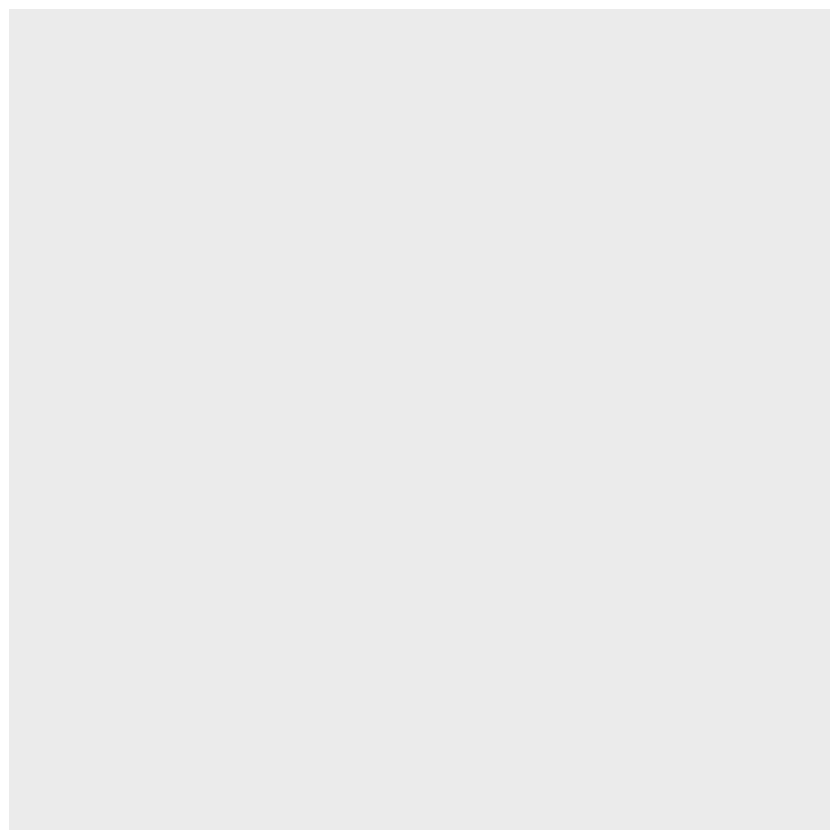

In [3]:
# Cargamos las librerías a utilizar
library(tidyverse)
library(dslabs)

# Cargamos los datos
data(murders)

# Asociamos los datos con el objeto ggplot
p <- ggplot(data = murders) # Asignamos el gráfico a un objeto, de lo contrario se ejecutara inmediatamente

# Podemos observar la clase de nuestro objeto
class(p)

# Podemos mostrar nuestro gráfico utilizando print() o simplemente llamándolo p
p

> Otra forma de asignar los datos es utilizando el pipe `murders %>% ggplot()` 

El código crea un gráfico, en este caso una pizarra en blanco ya que no se ha definido la geometría. La única opción de estilo que vemos es un fondo gris.

## 2.2 personalización de gráficos

### Capas

En ggplot2 creamos gráficos agregando capas (layers en inglés). Las capas pueden definir geometrías, calcular estadísticas de resumen, definir qué escalas (scales en inglés) usar o incluso cambiar estilos. Para añadir capas, usamos el símbolo +. En general, una línea de código se verá así:

```r
datos %>% ggplot() + CAPA 1 + CAPA 2 + ... + CAPA N
```
Usualmente, la primera capa que agregamos define la geometría. Los nombres de las funciones de geometría siguen el patrón: `geom_X` donde `X` es el nombre de la geometría. Algunos ejemplos incluyen `geom_point`, `geom_bar` y `geom_histogram`.

Los mapeos estéticos (aesthetic mappings en inglés) describen cómo las propiedades de los datos se conectan con las características del gráfico, como la distancia a lo largo de un eje, el tamaño o el color. La función `aes()` conecta los datos con lo que vemos en el gráfico mediante la definición de asignaciones estéticas y, por eso, será una de las funciones que más utilizarán al gráficar.

`aes()` también usa los nombres de variables del componente objeto: podemos usar `population` y `total` sin tener que llamarlos como `murders$population` y `murders$total`. El comportamiento de reconocer las variables del componente de datos es específico a aes. Con la mayoría de las funciones, si intentan acceder a los valores de `population` o `total` fuera de `aes`, recibirán un error.

`geom_point()` Crea un scatterplot y requiere mapeos estéticos `x` e `y`.

Las funciones `geom_label` y `geom_text` nos permiten añadir texto al gráfico con o sin un rectángulo detrás del texto, respectivamente(también requieren mapeos estéticos).

Podemos agregar capas con diferentes asignaciones estéticas al mismo gráfico.

Veamos como quedaría nuestro gráfico utilizando estas capas


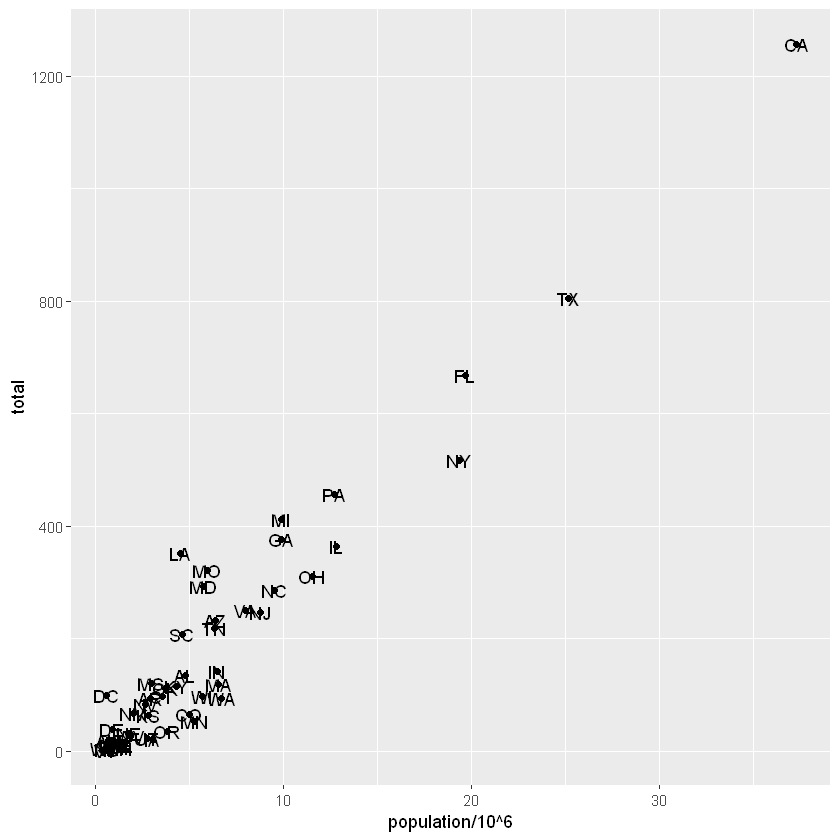

In [5]:
# Cargamos las librerías y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders)

# # Añadimos las capas
p + geom_point(aes(population/10^6, total)) + # primer capa (el scatterplot)
    geom_text(aes(population/10^6, total, label = abb)) # segunda capa (los indicadores de texto)

### Retocando

Cada función de geometría tiene muchos otros argumentos además de aes y data. Estos suelen ser específicos de la función(Por lo que será necesario revisar la documentación).

Algunos ejemplos son:

`size`: Nos ayuda a definir el tamaño de los puntos(En `geom_point`).

`nudge_x` : Mueve el texto ligeramente hacia la derecha o hacia la izquierda(En `geom_text`)

Estos no son un mapeo: mientras los mapeos usan datos de observaciones específicas y necesitan estar dentro de `aes()`, las operaciones que queremos que afecten a todos los puntos de la misma manera no necesitan ser incluidas dentro `aes`.

Otra opción a tener en cuenta son los mapeos globales, los cuales nos ayudan a evitar repetir mapeos que serán utilizados por varias geometrías. Estos mapeos globales son definidos directamente en la función `ggplot()`.

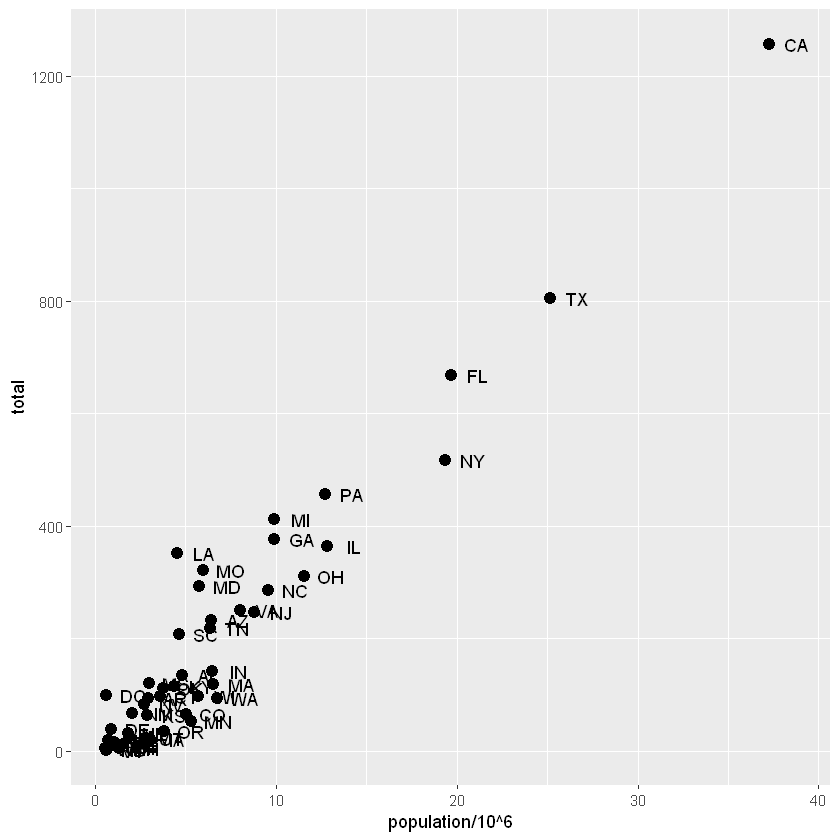

In [11]:
# Mapeo local
# Cargamos las librerías y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders)

# # Añadimos las capas
p + geom_point(aes(population/10^6, total), size = 3) + # primer capa (el scatterplot)
    geom_text(aes(population/10^6, total, label = abb), nudge_x = 1.5) # segunda capa (los indicadores de texto)

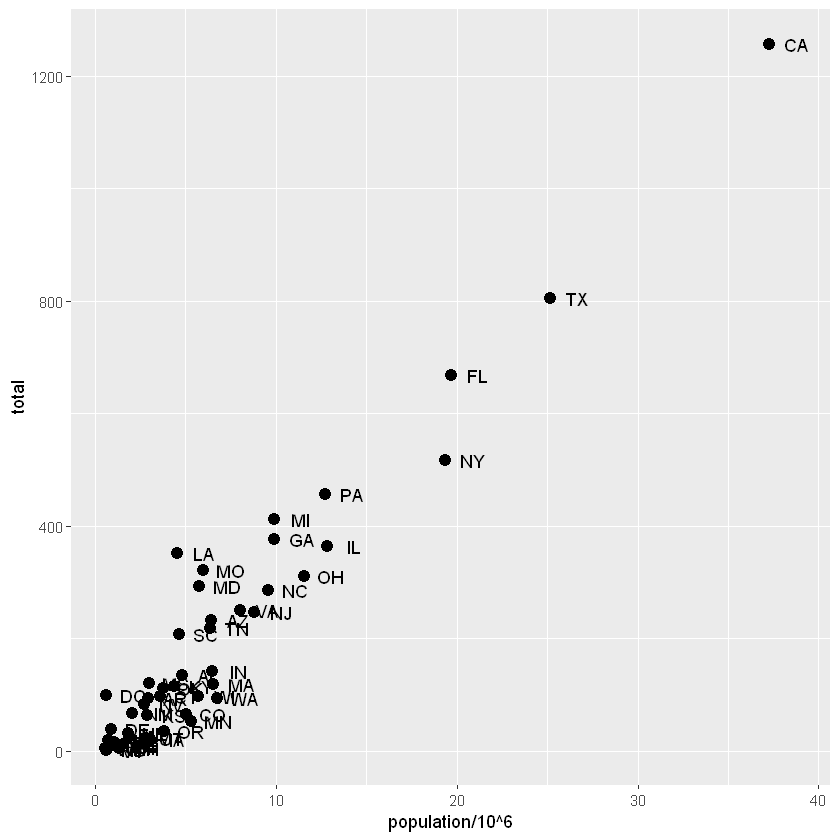

In [12]:
# Mapeo global
# Cargamos las librerías y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders, aes(population/10^6, total, label = abb))

# # Añadimos las capas
p + geom_point(size = 3) + # primer capa (el scatterplot)
    geom_text(nudge_x = 1.5) # segunda capa (los indicadores de texto)

Obtendremos el mismo gráfico, ya que las entradas del mapeo global que no sean necesarias para una capa serán ignoradas

> Si agregamos un mapeo a una capa este sobrescribirá el mapeo global, por lo que conservara el valor que le asignemos exclusivamente a ella

### Escalas, etiquetas y colores

#### Escalas

Primero, las escalas que queremos están en escala logarítmica. Este no es el valor predeterminado, por lo que este cambio debe añadirse a través de una capa de escalas.

La función `scale_x_continuous` nos permite controlar el comportamiento de las escalas. La usamos así:

```r
p + geom_point(size = 3) +
geom_text(nudge_x = 0.05) +
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10")
```

> Debido al cambio de escala, debemos cambiar el ajuste a la posición

Esta transformación particular es tan común que ggplot2 ofrece dos funciones especializadas `scale_x_log10` y `scale_y_log10`

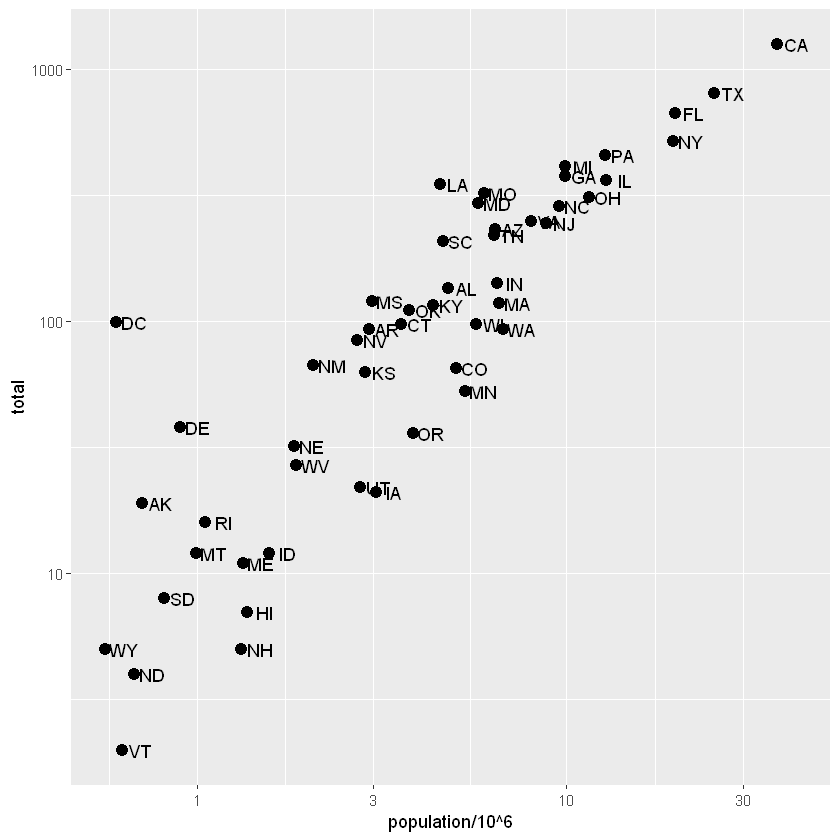

In [14]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_log10() + # Cambiamos la base del eje x
    scale_y_log10() # Cambiamos la base del eje y

#### Etiquetas y títulos

Agregar etiquetas y títulos también requiere agregar capas de la siguiente manera

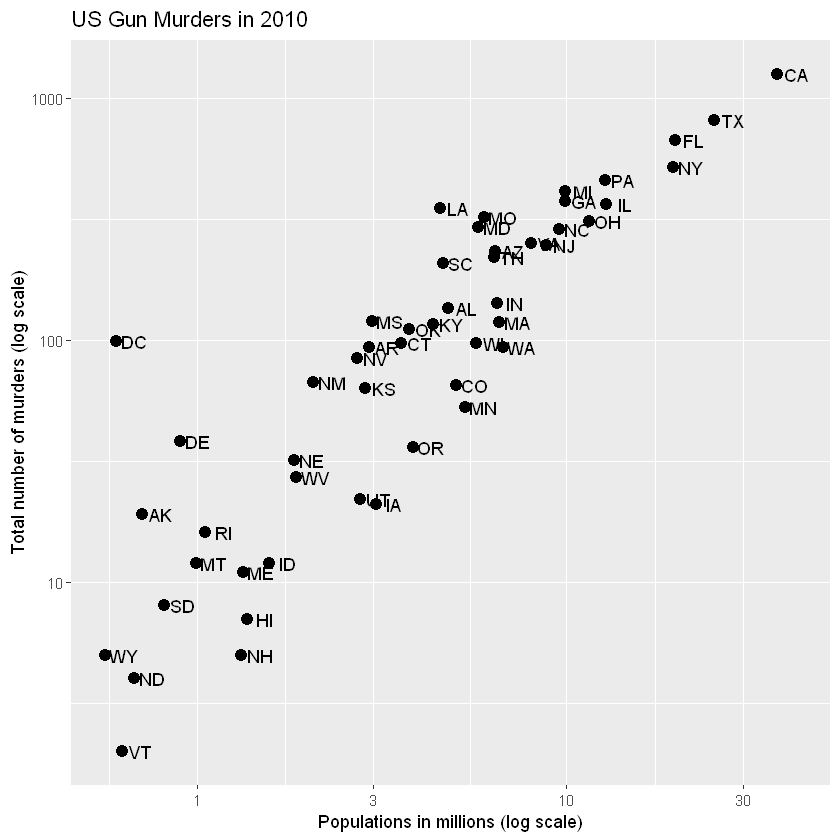

In [15]:
p + geom_point(size = 3) +
geom_text(nudge_x = 0.05) +
scale_x_log10() +
scale_y_log10() +
xlab("Populations in millions (log scale)") + # Etiqueta del eje x
ylab("Total number of murders (log scale)") + # Etiqueta del eje y
ggtitle("US Gun Murders in 2010") # Titulo

#### Categorías como colores

Podemos cambiar el color de los puntos usando el argumento col en la función `geom_point`. Para facilitar la demostración de características nuevas, redefiniremos `p` para ser todo excepto la capa de puntos:

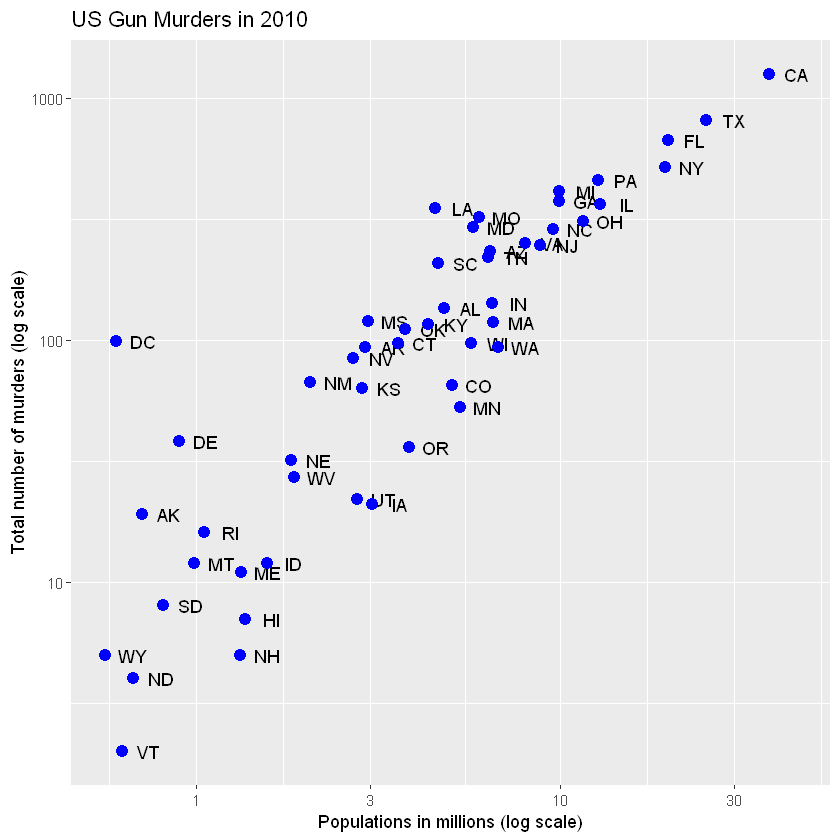

In [18]:
# Asignamos todo el gráfico a p, excepto la capa geom_point
p <- murders %>% ggplot(aes(population/10^6, total, label = abb)) +
geom_text(nudge_x = 0.075) +
scale_x_log10() +
scale_y_log10() +
xlab("Populations in millions (log scale)") +
ylab("Total number of murders (log scale)") +
ggtitle("US Gun Murders in 2010")

# Cambiamos el color de los puntos a azul
p + geom_point(size = 3, col = "blue")

Pero nosotros queremos asignar color según la región geográfica. 

Un buen comportamiento por defecto de `ggplot2` es que si asignamos una variable categórica al color, automáticamente asigna un color diferente a cada categoría, además de una leyenda. 

Dado que la elección del color está determinada por una característica de cada observación, este es un mapeo estético. Para asignar un color a cada punto, necesitamos usar `aes`.

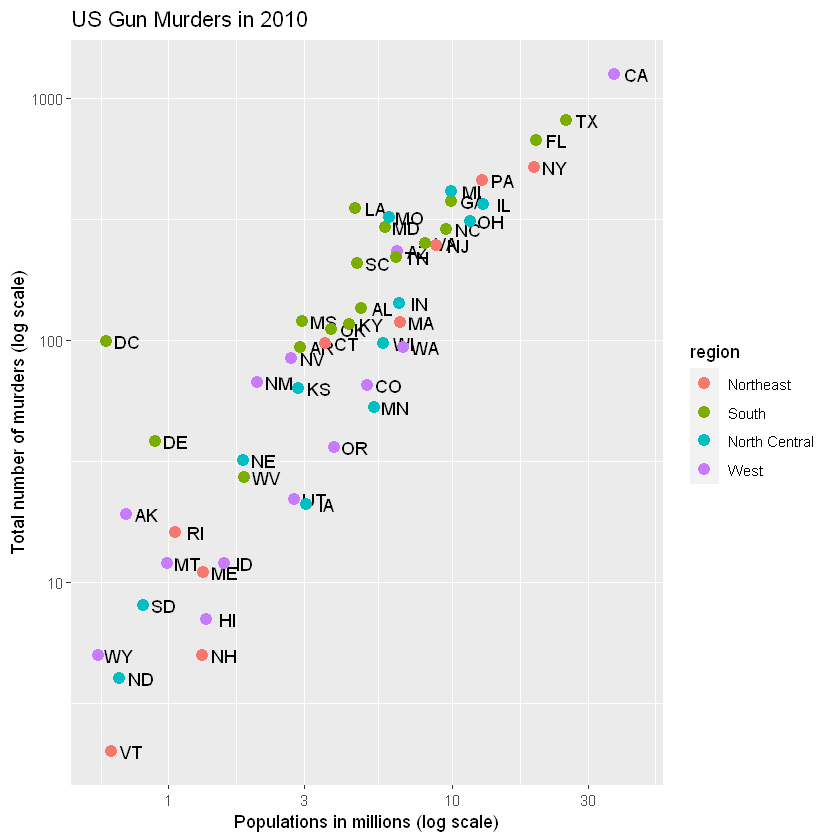

In [19]:
# Cambiamos el color por categoría
p + geom_point(aes(col = region), size = 3)

### Anotación, formas y ajustes

A menudo queremos añadir formas o anotaciones a las figuras que no se derivan directamente del mapeo estético; algunos ejemplos incluyen etiquetas, cuadros, áreas sombreadas y líneas.

Aquí queremos añadir una línea que represente la tasa promedio de asesinatos en todo el país. Una vez que determinemos la tasa por millón a ser 𝑟, esta línea se define por la fórmula: 𝑦 = 𝑟𝑥, con 𝑦 y 𝑥 nuestros ejes: asesinatos totales y población en millones, respectivamente.
En la escala logarítmica, esta línea se convierte en: log(𝑦) = log(𝑟) + log(𝑥). Entonces, en nuestro gráfico, es una línea con pendiente 1 e intercepto log(𝑟). Para calcular este valor, utilizamos:

In [23]:
# Definimos la tasa promedio de asesinatos
r <- murders %>%
summarize(rate = sum(total)/ sum(population) * 10^6) %>%
pull(rate)


Para añadir una línea, usamos la función `geom_abline`. `ggplot2` utiliza `ab` en el nombre para recordarnos que estamos suministrando el intercepto (a) y el pendiente (b). La línea predeterminada tiene pendiente 1 e intercepto 0, por lo que solo tenemos que definir el intercepto:

```r
p + geom_point(aes(col=region), size = 3) +
geom_abline(intercept = log10(r))
```

Aquí `geom_abline` no utiliza ninguna información del objeto de datos.
Podemos cambiar el tipo de línea y el color de las líneas usando argumentos. Además, la dibujamos primero para que no tape nuestros puntos.

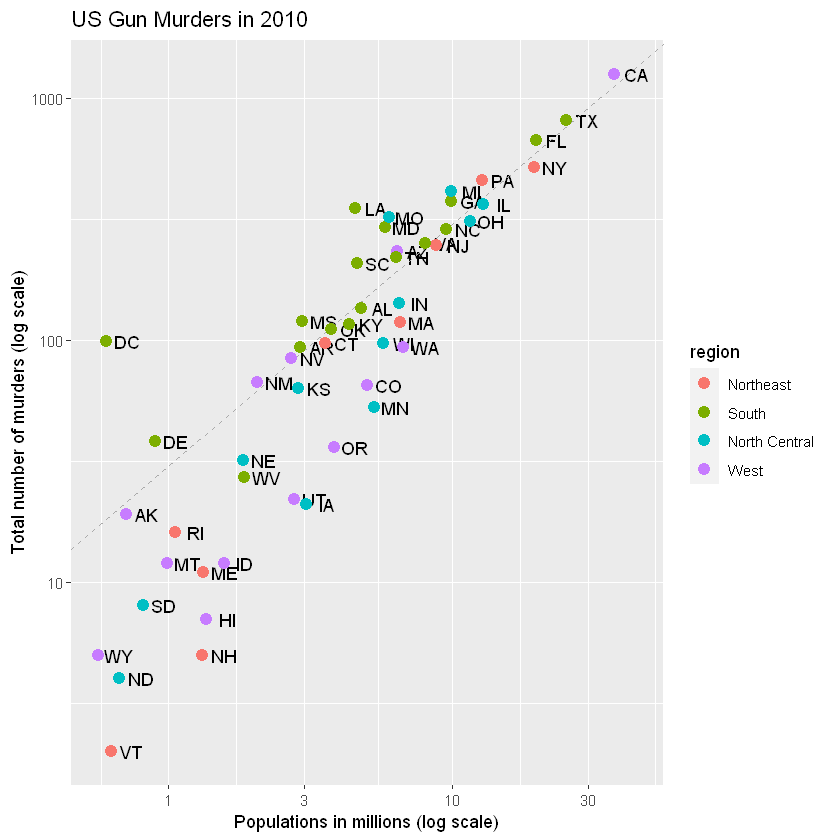

In [24]:
# Agregamos la linea
p <- p + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
    geom_point(aes(col=region), size = 3)

p

Con frecuencia necesitamos hacer pequeños ajustes al comportamiento predeterminado. 

Por ejemplo, podemos hacer cambios a la leyenda a través de la función `scale_color_discrete`. En nuestro gráfico original, la palabra región está en minúscula y podemos cambiarla así:

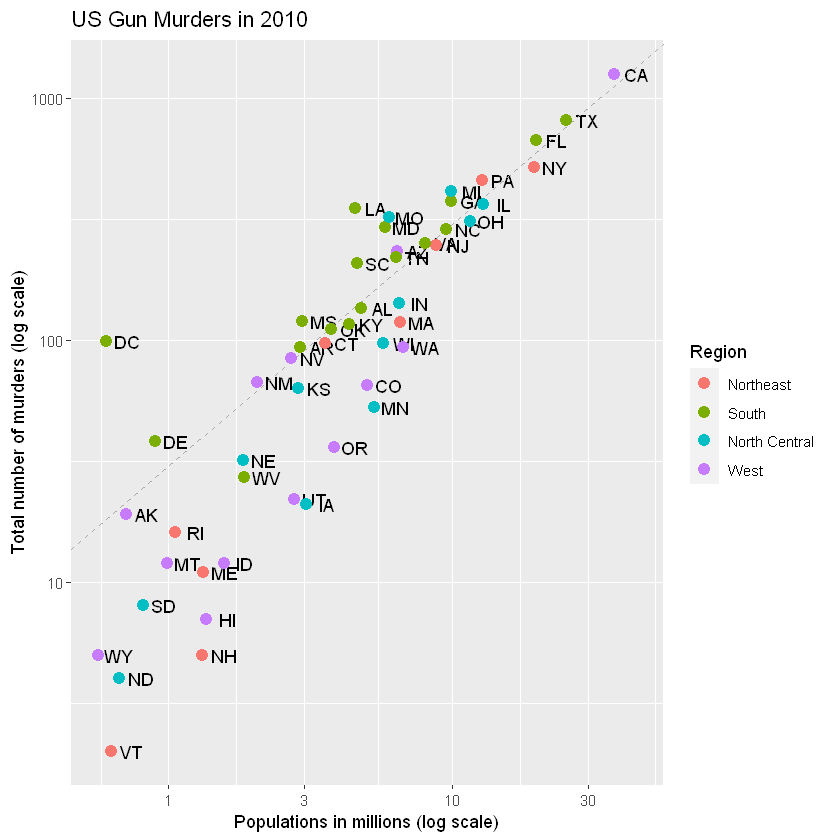

In [25]:
p <- p + scale_color_discrete(name = "Region")
p

### Paquetes complementarios

El poder de ggplot2 se incrementa aún más debido a la disponibilidad de paquetes adicionales

El estilo de un gráfico ggplot2 se puede cambiar usando las funciones de `theme`.

Algunos temas son incluidos en la librería `dslabs`, los cuales pueden ser cambiados utilizando

```r
ds_theme_set()
```

El paquete `ggthemes` añade muchos otros temas, incluso el tema `theme_economist` que escogimos, para utilizarlo es necesario agregar una nueva capa a nuestro gráfico

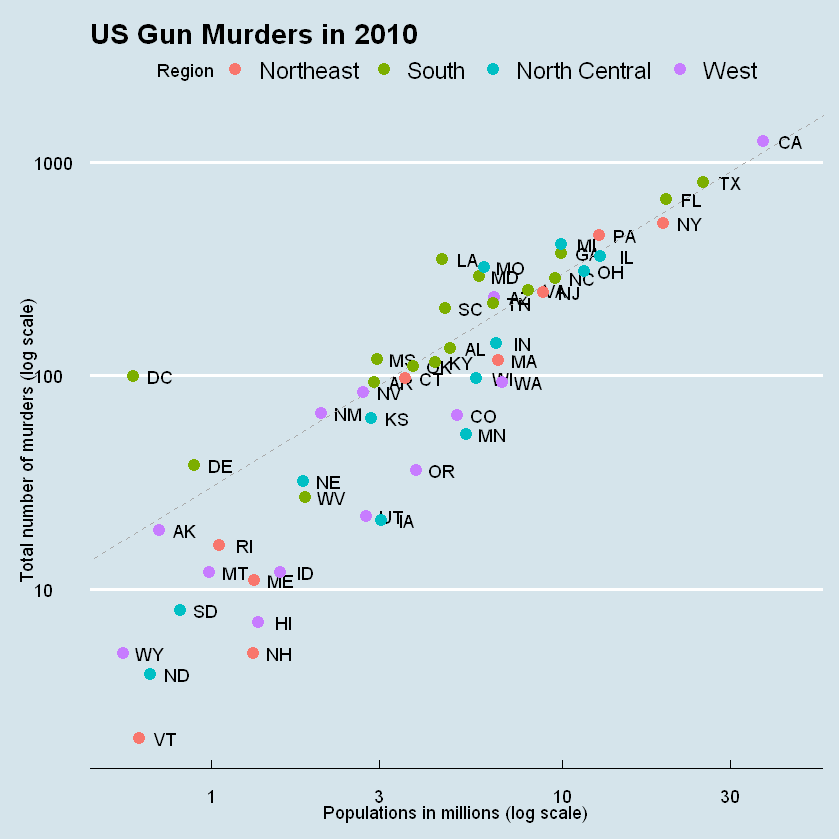

In [29]:
library(ggthemes) # cargamos la librería con los temas
p + theme_economist() # Agregamos la capa del tema

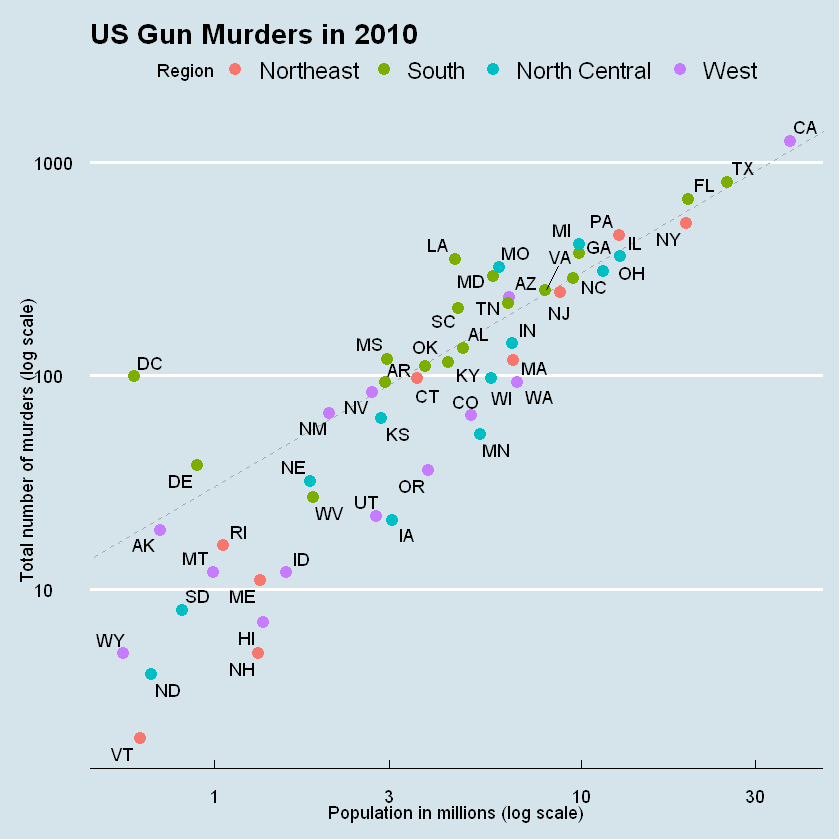

In [32]:
# Cargamos las librerías necesarias
library(tidyverse)
library(ggrepel)
library(ggthemes)
library(dslabs)

# Seleccionamos los datos
data(murders)

# Definimos el intercepto
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    .$rate
    
# Creamos el gráfico
murders %>% # Enlazamos los datos al gráfico
    ggplot(aes(population/10^6, total, label = abb)) + # Definimos el mapeo global
    geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") + # Agregamos el intercepto
    geom_point(aes(col = region), size = 3) + # Creamos el scatterplot
    geom_text_repel() + # Agregamos los marcadores de texto sin superposición
    scale_x_log10() + # Ajustamos la escala de x
    scale_y_log10() + # Ajustamos la escala de y
    xlab("Population in millions (log scale)") + # Agregamos la etiqueta de x
    ylab("Total number of murders (log scale)") + # Agregamos la etiqueta de y
    ggtitle("US Gun Murders in 2010") + # Agregamos el título del gráfico
    scale_color_discrete(name = "Region") + # Corregimos el nombre de las acotaciones
    theme_economist() # Agregamos el tema de economía

### Otros gráficos


- `geom_histogram()` crea un histograma.
    - `binwidth`: Cambia el ancho de las barras(bins).
    - `fill`: Cambia el color de relleno.
    - `col`: Cambia el color del contorno.

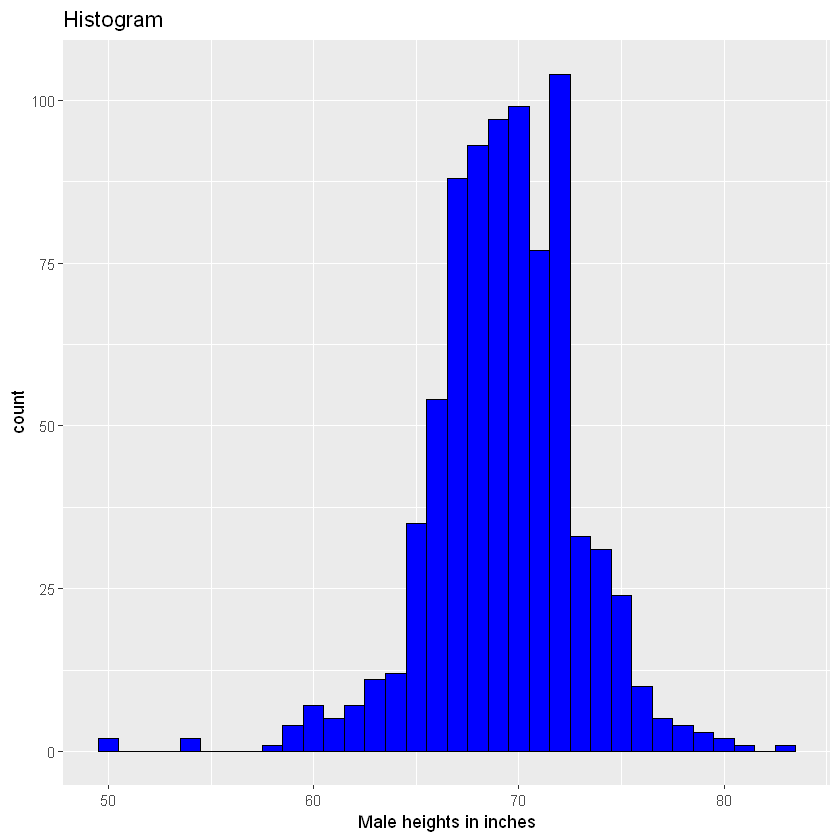

In [34]:
# Cargamos las librerías necesarias y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(heights)

# definimos nuestro objeto ggplot
p <- heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(x = height))

# Creamos un histograma con relleno azul, contorno negro con etiquetas y titulo
p1 <- p + geom_histogram(binwidth = 1, fill = "blue", col = "black") +
    xlab("Male heights in inches") +
    ggtitle("Histogram")
p1

- `geom_density()`: Crea un gráfico de densidad suave.
    - `fill`: Cambia el color de relleno.

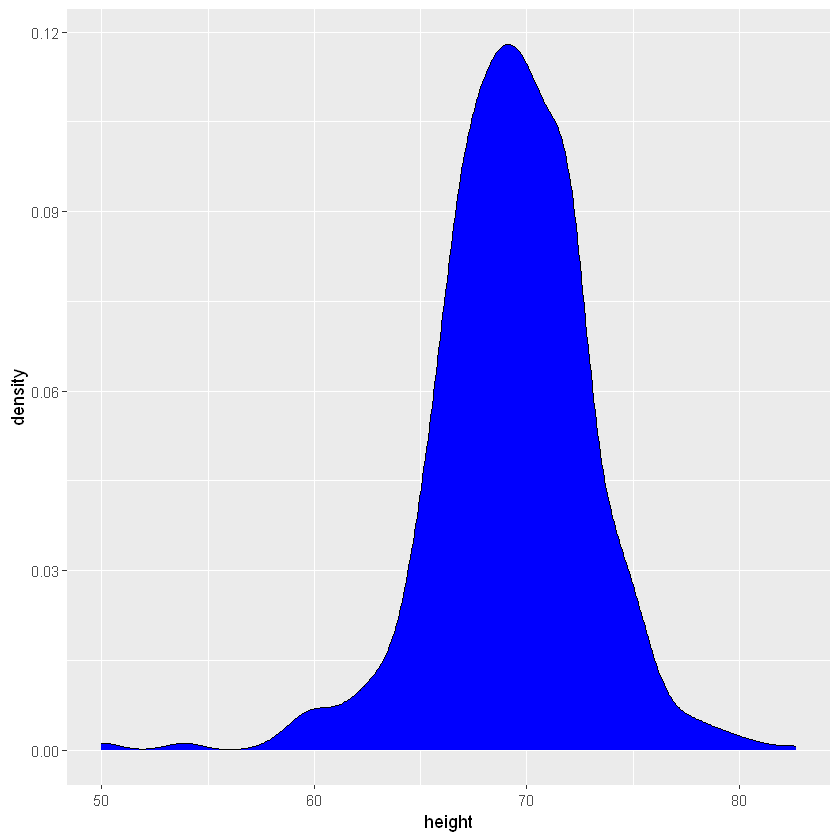

In [35]:
# Creamos un gráfico de densidad con relleno azul
p2 <- p + geom_density(fill = "blue")
p2

- `geom_qq()`: Crea un gráfico cuantil-cuantil (Q-Q).
    - De forma predeterminada, los datos se comparan con una distribución normal estándar con una media de 0 y una desviación estándar de 1. Esto se puede cambiar con el argumento `dparams` o se puede escalar la muestra de datos.

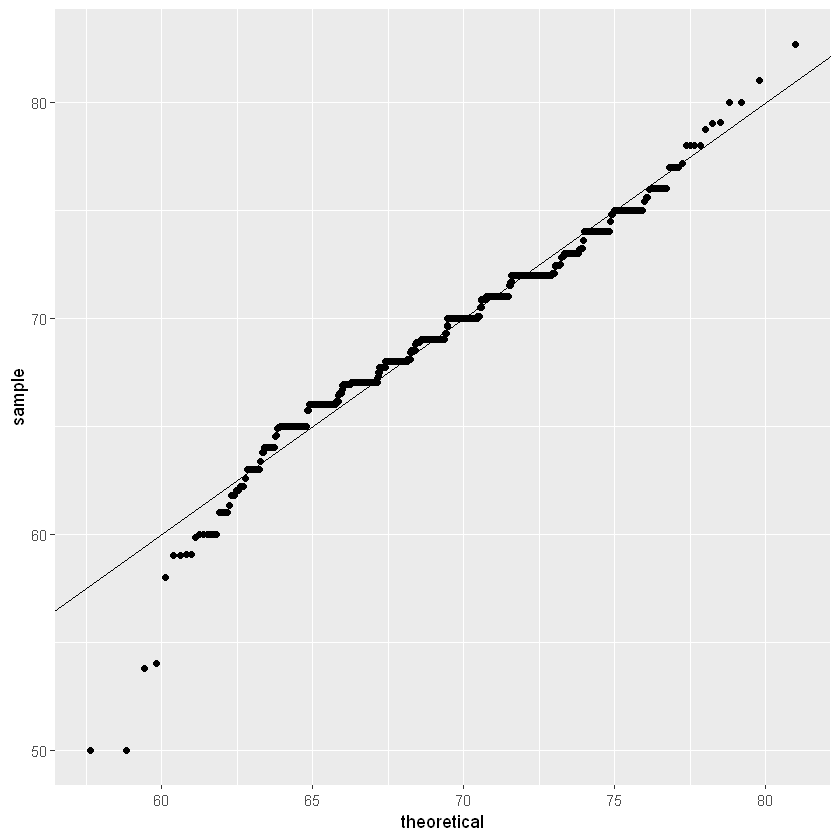

In [39]:
# Creamos un QQ-plot con una distribución normal con la misma media/SD que los datos
p <- heights %>% filter(sex == "Male") %>%
    ggplot(aes(sample = height))
params <- heights %>%
    filter(sex == "Male") %>%
    summarize(mean = mean(height), sd = sd(height))
p3 <- p + geom_qq(dparams = params) +
    geom_abline()
p3

Los gráficos se pueden organizar uno al lado de otro usando la función `grid.arrange()` del paquete `gridExtra`. Primero, cree los gráficos y guárdelos en objetos (p1, p2, ...). Luego pase los objetos a `grid.arrange()`.

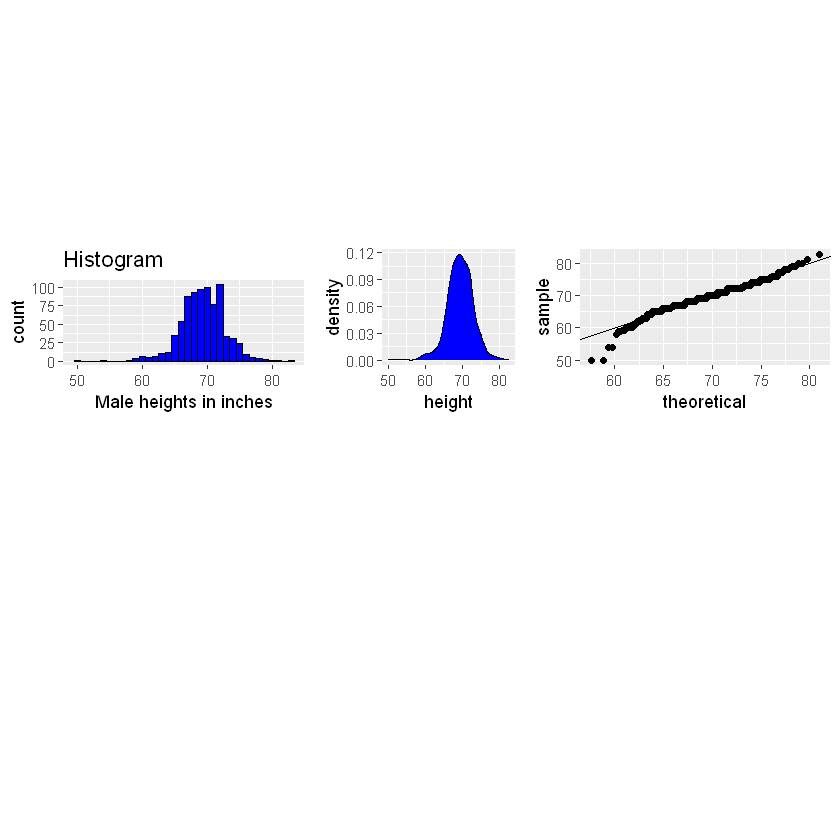

In [49]:
# Juntamos los tres gráficos en un arreglo de 1 fila y 3 columnas.
library(gridExtra)
grid.arrange(p1, p2, p3, ncol = 3, widths = c(3, 2, 3), heights = unit(c(1.5, 1.5), "inch"))

## Evaluación 2: Introducción a `ggplot2`

### Ejercicio 1: Lo básico de ggplot2

Comience cargando los paquetes `dplyr` y `ggplot2`, así como los datos `murders` y `heights`.

```r
library(dplyr)
library(ggplot2)
library(dslabs)
data(heights)
data(murders)
```

Con ggplot2, los gráficos se pueden guardar como objetos. Por ejemplo, podemos asociar un set de datos con un objeto de gráfico así:

```r
p <- ggplot(data = murders)
```

Como data es el primer argumento, no necesitamos explicarlo:

```r
p <- ggplot(murders)
```

y también podemos usar el pipe:

```r
p <- murders %>% ggplot()
```

¿Cuál es la clase del objeto p?

In [50]:
source("./Scripts/2/Ejercicio1.r", print.eval = TRUE)

[1] "gg"     "ggplot"


### Ejercicio 2: pipes

Usando el pipe `%>%`, cree un objeto p pero esta vez asociado con el set de datos `heights` en lugar del set de datos `murders`.

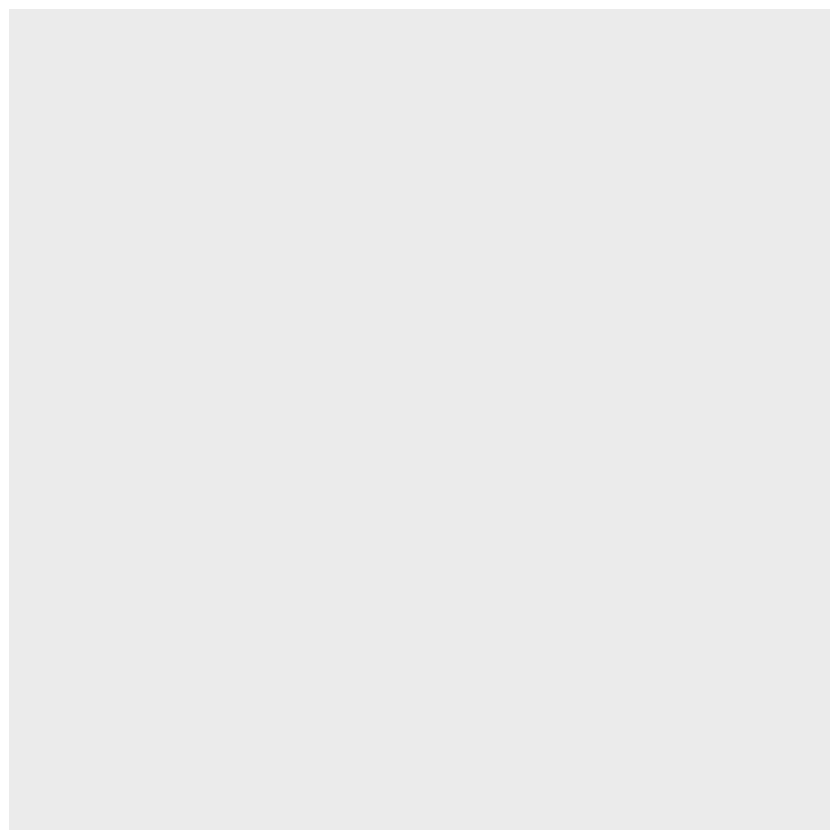

In [51]:
source("./Scripts/2/Ejercicio2.r", print.eval = TRUE)

### Ejercicio 3: `geom_point` 1

Para crear el diagrama de dispersión, agregamos una capa con `geom_point`. Los mapeos estéticos requieren que definamos las variables del eje-x y del eje-y, respectivamente. 

Entonces el código se ve así:

```r
murders %>% ggplot(aes(x = , y = )) +
geom_point()
```

excepto que tenemos que definir las dos variables x e y. 

Llene el espacio con los nombres correctos de las variables.

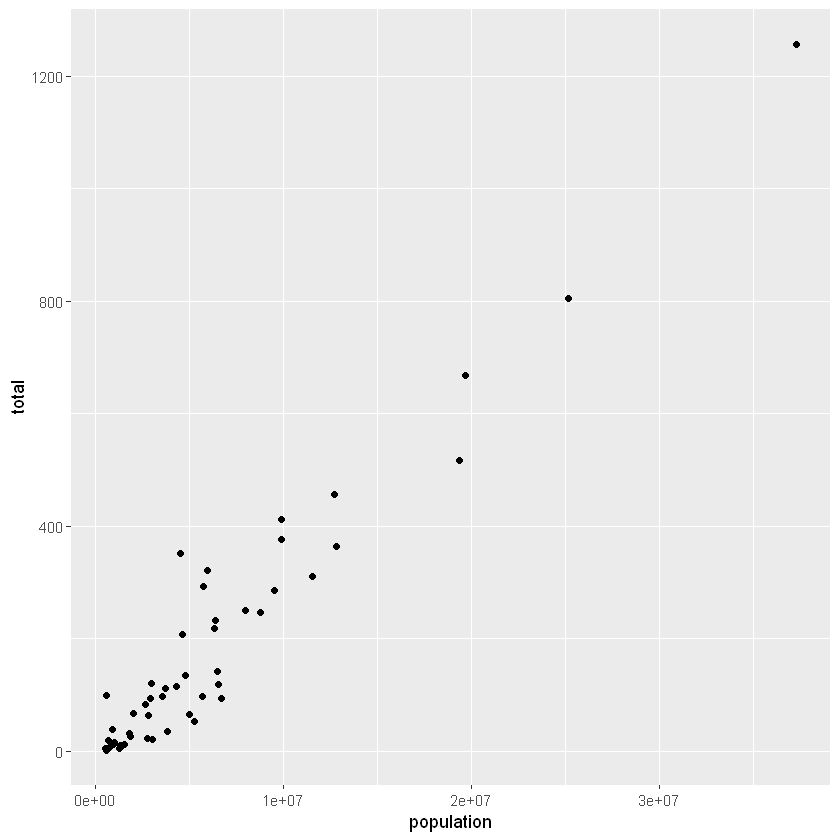

In [52]:
source("./Scripts/2/Ejercicio3.r", print.eval = TRUE)

### Ejercicio 4: `geom_point` 2

Recuerde que si no usamos nombres de argumentos, podemos obtener el mismo gráfico si ingresamos los nombres de las variables en el orden correcto de esta manera:

```r
murders %>% ggplot(aes(population, total)) +
geom_point()
```

Vuelva a hacer el gráfico pero ahora con total en el eje-x y población en el eje-y.

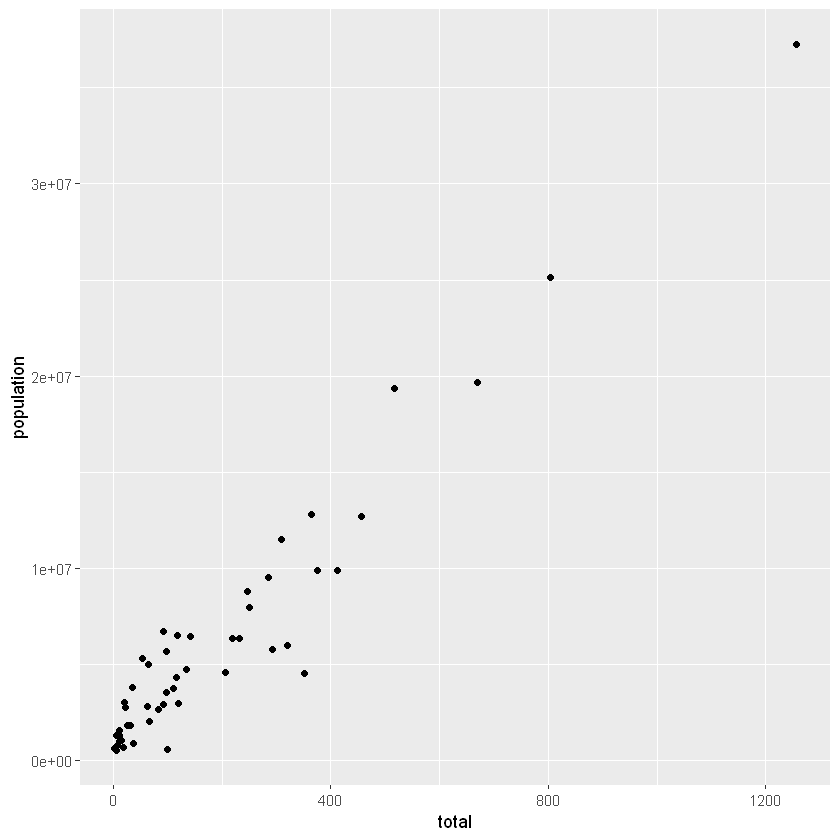

In [53]:
source("./Scripts/2/Ejercicio4.r", print.eval = TRUE)

### Ejercicio 5: `geom_point` text

Reescriba el código

```r
murders %>% ggplot(aes(population, total)) + geom_label()
```

para que use abreviaturas como el `label` (la etiqueta) a través de `aes`.

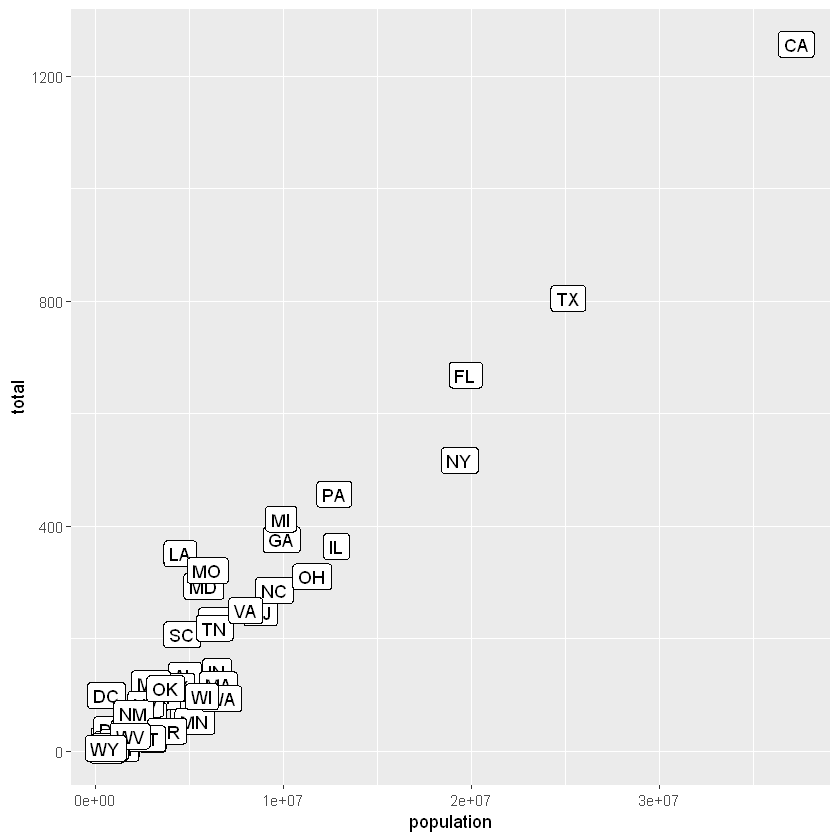

In [54]:
source("./Scripts/2/Ejercicio5.r", print.eval = TRUE)

### Ejercicio 6: `geom_point` colors 2

Reescriba el código anterior para que las etiquetas sean azules.

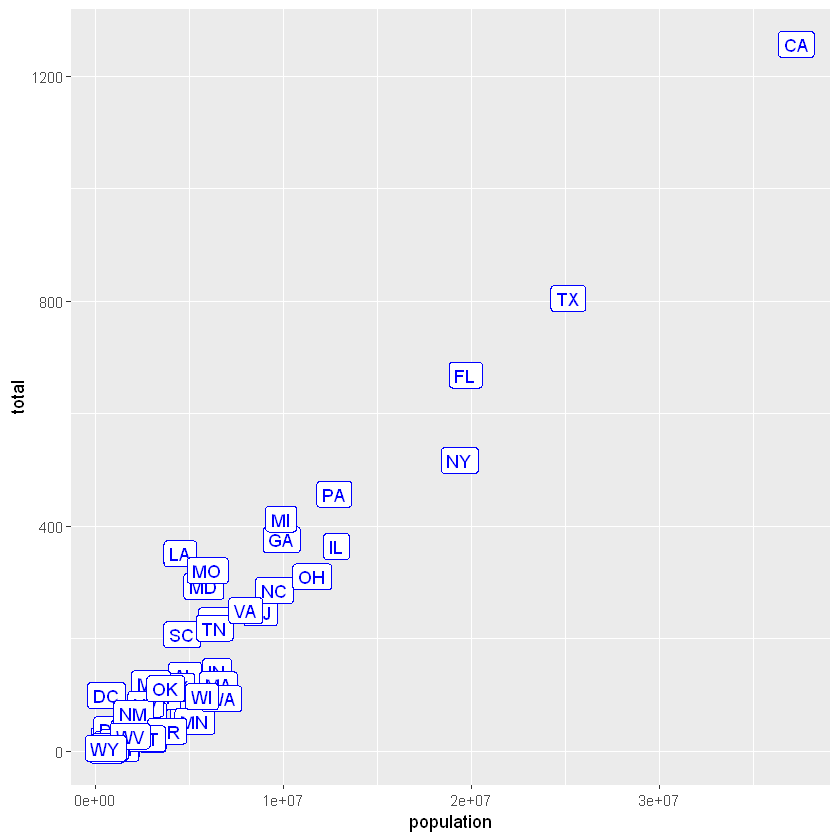

In [55]:
source("./Scripts/2/Ejercicio6.r", print.eval = TRUE)

### Ejercicio 7: `geom_label` colors

Reescriba el código anterior para que el color de las etiquetas sea determinado por la región del estado.

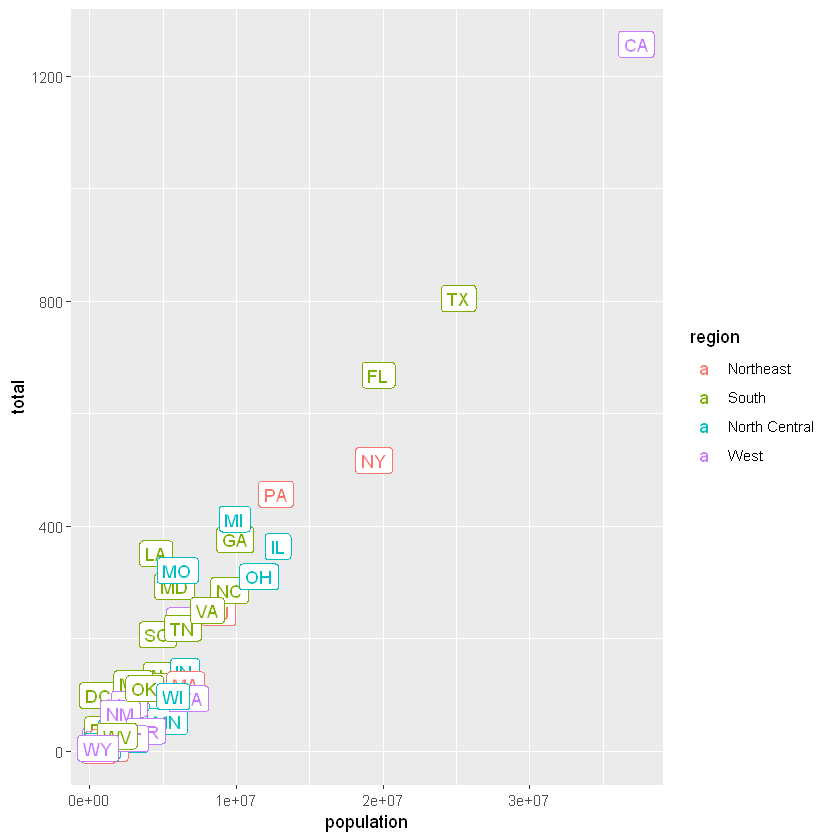

In [56]:
source("./Scripts/2/Ejercicio7.r", print.eval = TRUE)

### Ejercicio 8: Escala log

14. Ahora vamos a cambiar el eje-x a una escala logarítmica para tomar en cuenta el hecho de que la distribución de la población es asimétrica. Comencemos definiendo un objeto `p` guardando el gráfico que hemos hecho hasta ahora:

```r
p <- murders %>%
ggplot(aes(population, total, label = abb, color = region)) +
geom_label()
```

Para cambiar el eje-y a una escala logarítmica, aprendimos sobre la función `scale_x_log10()`.

Agregue esta capa al objeto p para cambiar la escala y crear el gráfico.

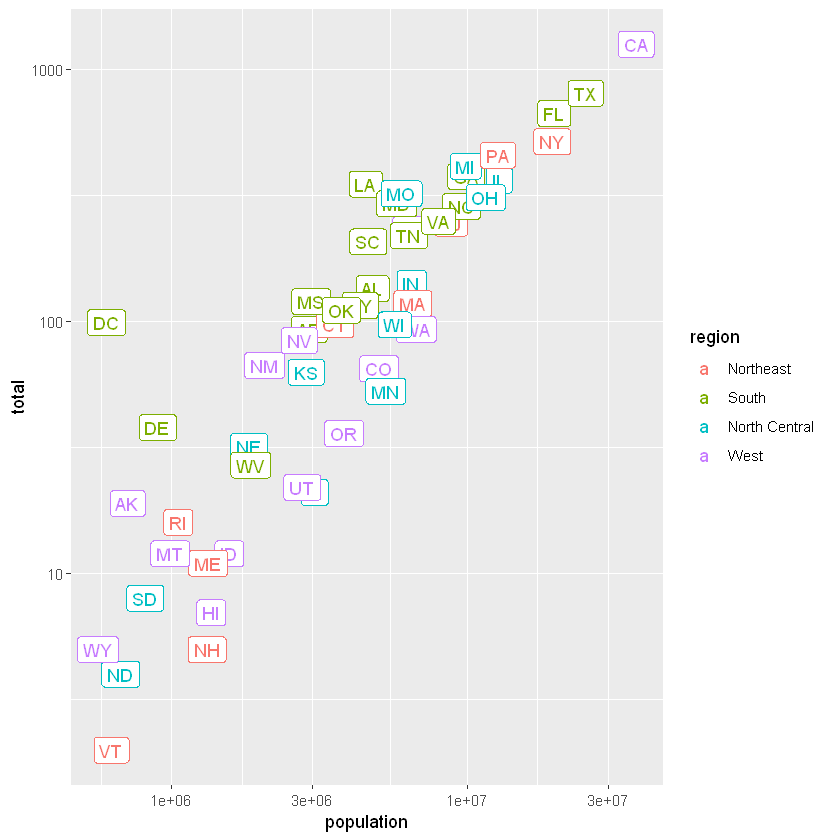

In [57]:
source("./Scripts/2/Ejercicio8.r", print.eval = TRUE)

### Ejercicio 9: Títulos

Ahora edite el código anterior para añadir el título “Gun murder data” al argumento.

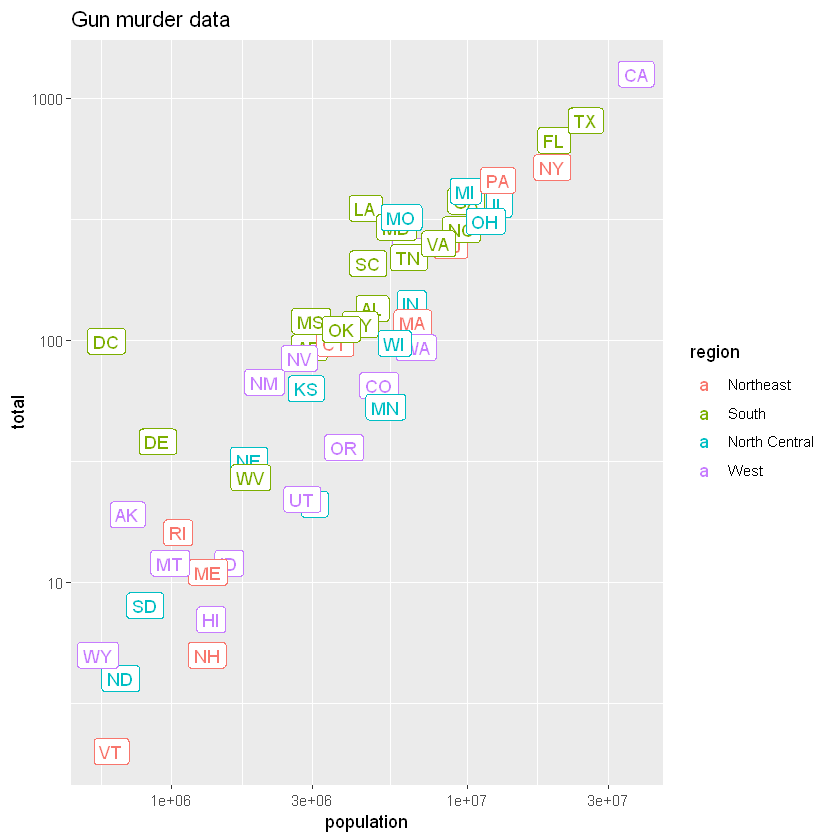

In [58]:
source("./Scripts/2/Ejercicio9.r", print.eval = TRUE)

### Ejercicio 10: Un segundo ejemplo

Ahora vamos a hacer un histograma de las alturas, así que cargaremos el conjunto de datos de alturas. El siguiente código se ejecutó previamente para que pueda cargar el conjunto de datos de alturas:

```r
library(dplyr)
library(ggplot2)
library(dslabs)
data(heights)
```

Cree un objeto `ggplot` llamado `p` usando pipe para asignar los datos de `heights` a un objeto `ggplot`.
Asigne `height` a los valores de `x` a través de la función `aes`.

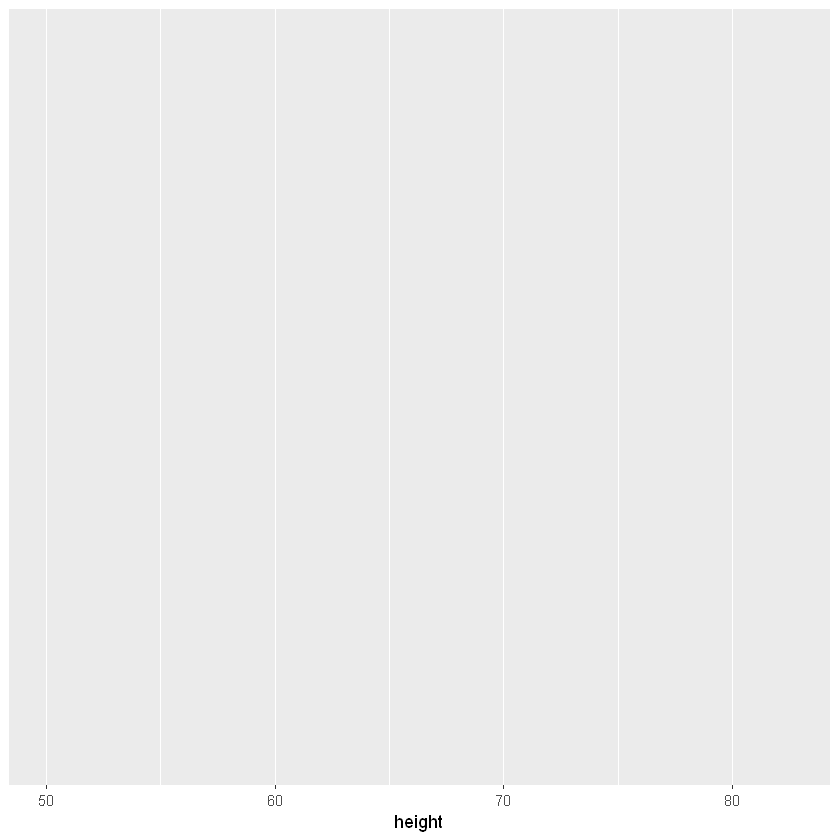

In [59]:
source("./Scripts/2/Ejercicio10.r", print.eval = TRUE)

### Ejercicio 11: Histogramas 2

Agregue una capa al objeto `p` creado anteriormente usando la función `geom_histogram` para crear un histograma

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


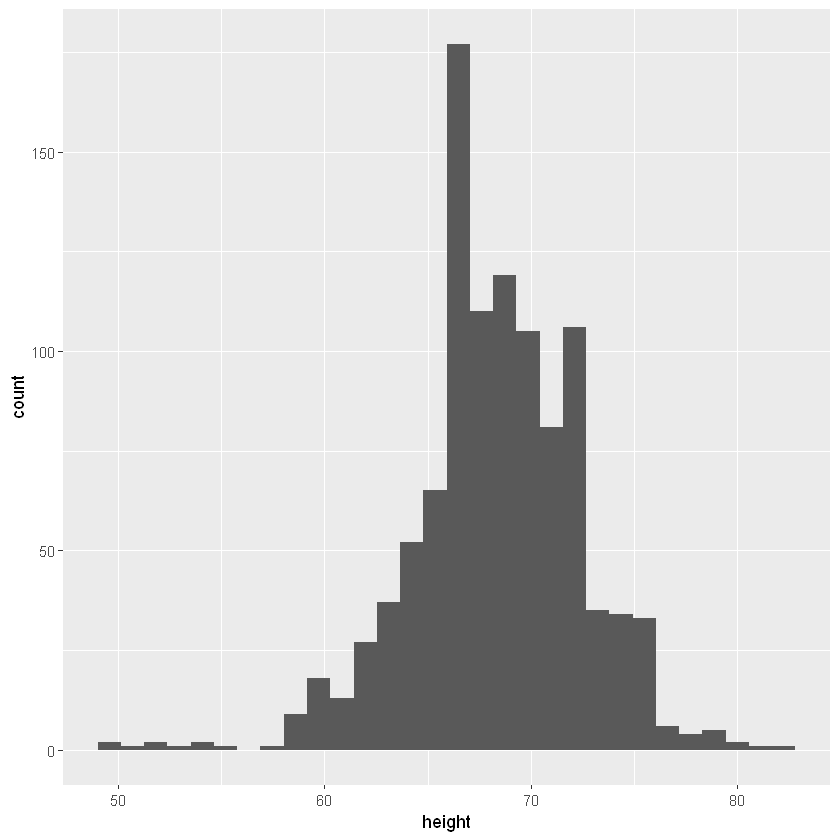

In [61]:
source("./Scripts/2/Ejercicio11.r", print.eval = TRUE)

### Ejercicio 12: Histograma `binwidth`

Tenga en cuenta que cuando ejecutamos el código del ejercicio anterior obtenemos la siguiente advertencia:

> *stat_bin() using bins = 30. Pick better value with binwidth.*
> 

Use el argumento `binwidth` para cambiar el histograma realizado en el ejercicio anterior para usar bins de tamaño de 1 pulgada.

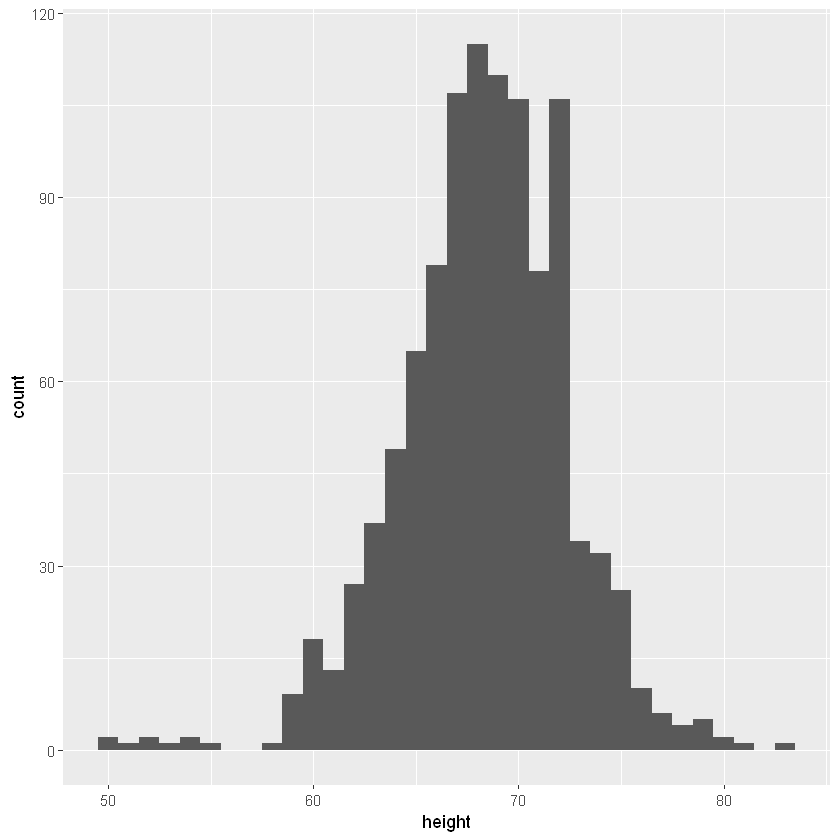

In [62]:
source("./Scripts/2/Ejercicio12.r", print.eval = TRUE)

### Ejercicio 13. Diagrama de densidad suave

Ahora, en lugar de un histograma, vamos a hacer un gráfico de densidad suave. En este caso, no haremos un objeto p. En su lugar, representaremos la trama usando una sola línea de código. En el ejercicio anterior, podríamos haber creado un histograma usando una línea de código como esta:

```r
heights %>% 
  ggplot(aes(height)) +
  geom_histogram()
```

Ahora, en lugar de `geom_histogram`, usaremos `geom_density` para crear un gráfico de densidad suave.

Agregue la capa adecuada para crear un diagrama de alturas de densidad suave.

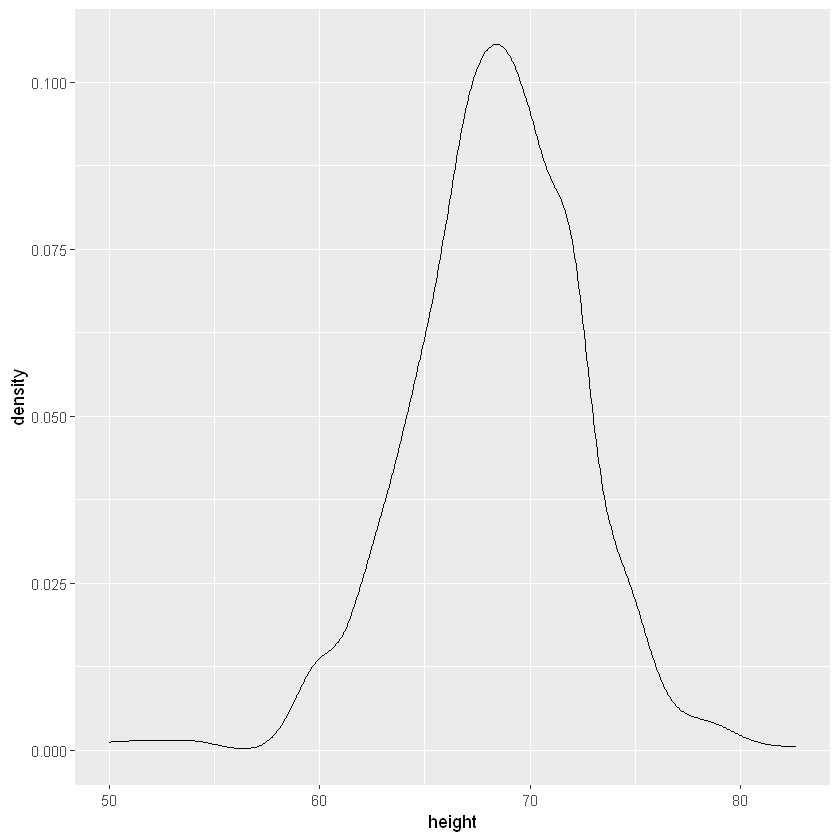

In [63]:
source("./Scripts/2/Ejercicio13.r", print.eval = TRUE)

### Ejercicio 14. Dos gráficas de densidad suave

Ahora vamos a hacer diagramas de densidad para `males` y `females` por separado. 

Podemos hacer esto usando el argumento `grup` dentro del mapeo `aes`. 

Debido a que a cada punto se le asignará una densidad diferente según una variable del conjunto de datos, debemos mapear dentro de `aes`.

Cree gráficos de densidad suave separadas para hombres y mujeres definiendo grupos por sexo. 

Use la función `aes` existente dentro de la función `ggplot`.

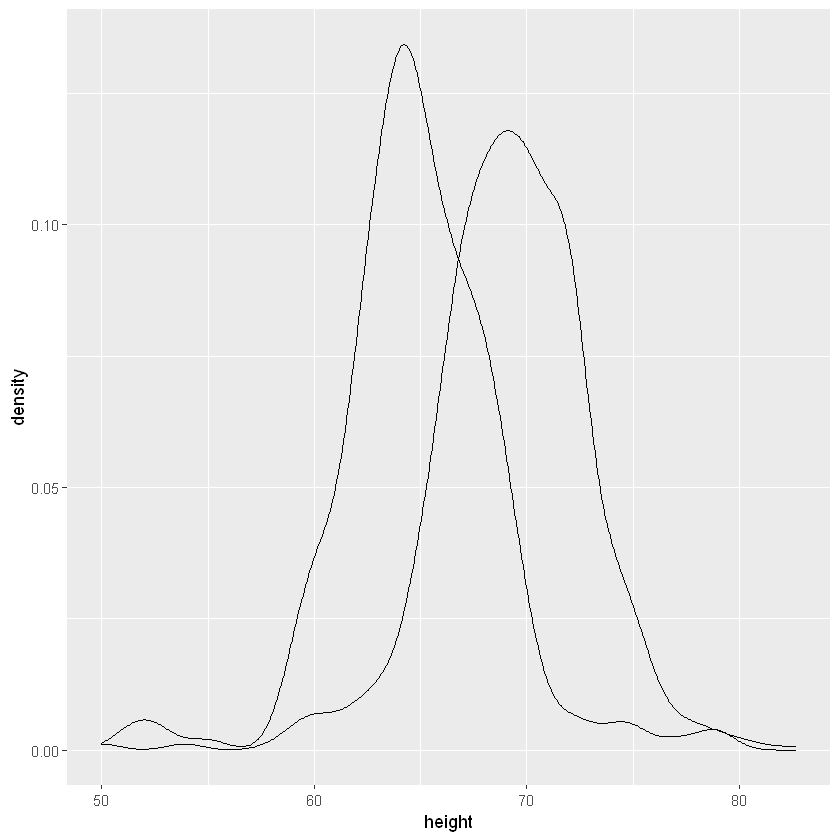

In [64]:
source("./Scripts/2/Ejercicio14.r", print.eval = TRUE)

### Ejercicio 15. Dos gráficas de densidad suave 2

En el ejercicio anterior hicimos las dos gráficas de densidad, una para cada sexo, usando:

```r
heights %>% 
  ggplot(aes(height, group = sex)) + 
  geom_density()
```

También podemos asignar grupos a través del argumento `color` o `fill`. Por ejemplo, si escribe `color = sex`, `ggplot` sabe que desea un color diferente para cada sexo. Entonces se deben dibujar dos densidades. Por lo tanto, puede omitir el mapeo de `grup = sex`. El uso del color tiene el beneficio adicional de que usa el color para distinguir los grupos.

Cambie las gráficas de densidad del ejercicio anterior para agregar color.

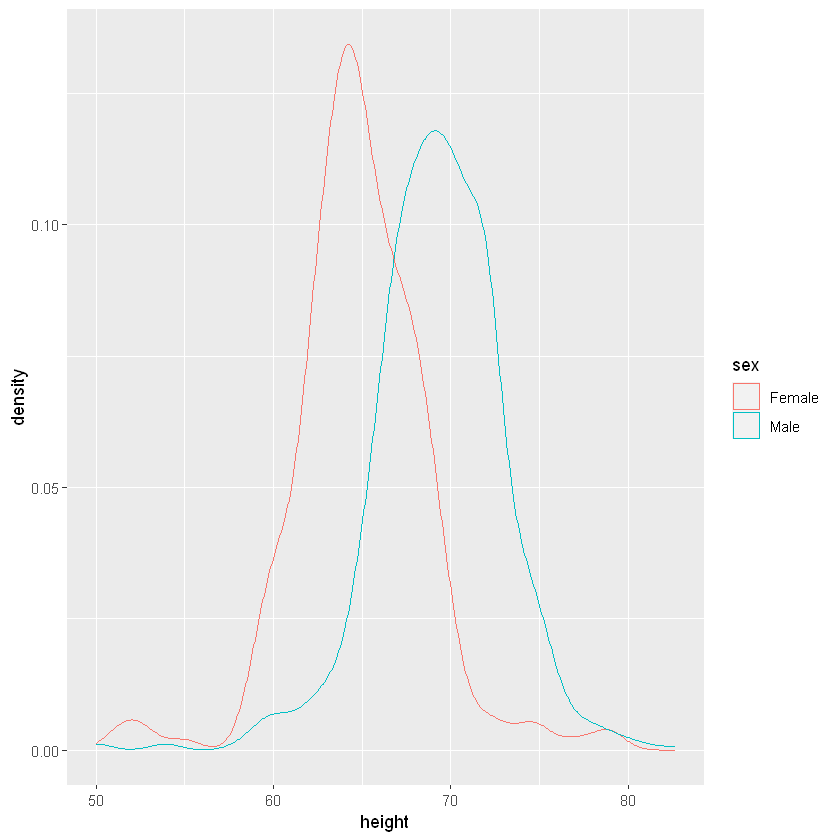

In [65]:
source("./Scripts/2/Ejercicio15.r", print.eval = TRUE)

### Ejercicio 16. Dos gráficas de densidad suave 3

También podemos asignar grupos usando el argumento `fill`. Cuando usamos la geometría `geom_density`, `color` crea una línea de color para la grafica de densidad, mientras que `fill` colorea debajo de la curva.

Podemos observar como es esto con el siguiente código:

```r
heights %>% 
  ggplot(aes(height, fill = sex)) + 
  geom_density()
```

Sin embargo, la segunda densidad es dibujada sobre la otra. Podemos cambiar esto usando algo llamado `alpha blending` (mezcla alpha).

Defina el parámetro `alpha` en 0.2 en la función `geom_density` para hacer este cambio

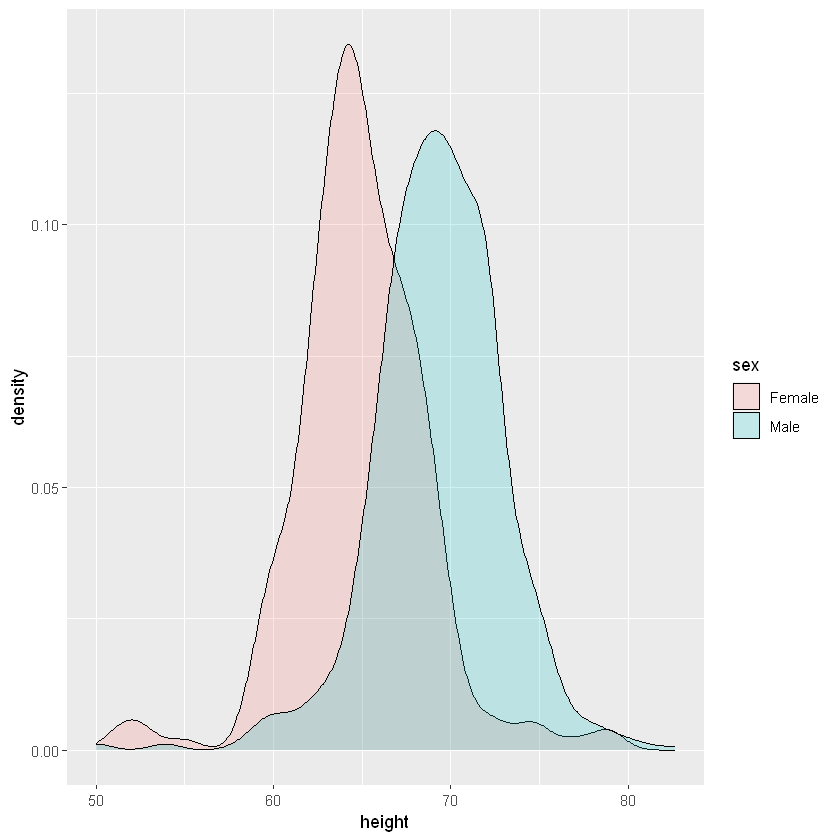

In [66]:
source("./Scripts/2/Ejercicio16.r", print.eval = TRUE)